In [1]:
import pandas as pd
import numpy as np
# mta_df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210605.txt')
# mta_df.to_csv('mta_turnstile_210605.csv', header=False, index=False)

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" #url with formatting to fill in the number of the particular week
    dfs = []
    for week_num in week_nums: 
        file_url = url.format(week_num) 
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs) #combine files for each week
weeks = [210605, 210612, 210619, 210626, 210703, 210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828]
# turnstiles_df = get_data(weeks)
# turnstiles_df.to_csv('mta_data_all.csv', header = False, index = False) #Imports all data to a csv that can be read by SQL

In [3]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine("sqlite:///mta_all.db")
all_data = pd.read_sql('SELECT * FROM mta_data;', engine)

In [4]:
ts_df1 = all_data
ts_df1.sample(20)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
561665,R155,R116,01-00-09,50 ST,1,IRT,06/18/2021,08:00:00,REGULAR,10598644,27706909
1441968,R423,R429,00-05-00,PELHAM BAY PARK,6,IRT,07/15/2021,08:00:00,REGULAR,150997148,0
1158167,N554,R423,01-04-01,AVENUE N,F,IND,07/05/2021,09:00:00,REGULAR,0,413
52923,N056,R188,01-00-03,50 ST,CE,IND,06/04/2021,00:00:00,REGULAR,307479147,307313410
753633,PTH16,R550,01-01-03,LACKAWANNA,1,PTH,06/20/2021,22:43:41,REGULAR,116255,39038
1544687,N220,R155,01-00-01,KINGSBRIDGE RD,BD,IND,07/22/2021,13:00:00,REGULAR,98838,68519
1833638,R227,R131,00-00-02,23 ST,6,IRT,07/27/2021,09:00:00,REGULAR,614633,291298
2569368,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,08/27/2021,00:00:00,REGULAR,281240,828113
1297024,J001,R460,01-06-01,MARCY AV,JMZ,BMT,07/16/2021,17:00:00,RECOVR AUD,742016,536294
1467129,A006,R079,00-00-02,5 AV/59 ST,NQRW,BMT,07/20/2021,18:00:00,REGULAR,6562417,16606261


In [5]:
import datetime as dt
ts_df1['Date_time'] = pd.to_datetime(ts_df1.DATE.astype(str) + ' ' + ts_df1.TIME.astype(str))
# ts_df1.head(5)

In [6]:
ts_df1.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'Date_time']).ENTRIES.count().reset_index().sort_values('ENTRIES', ascending=False).head(5)

,CA,UNIT,SCP,STATION,Date_time,ENTRIES
2448636,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 04:00:00,2
1172385,N335,R158,01-00-03,KEW GARDENS,2021-06-20 18:30:00,2
2457222,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 00:00:00,2
2457223,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 04:00:00,2
2457224,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 08:00:00,2


In [7]:
ts_df1.sort_values(['CA', 'UNIT', 'SCP', 'STATION', 'Date_time'], inplace=True, ascending=False)
ts_df1.drop_duplicates(subset=['CA', 'UNIT', 'SCP', 'STATION', 'Date_time'], inplace=True)


In [8]:
ts_df1.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'Date_time']).EXITS.count().reset_index().sort_values('EXITS', ascending=False).head(5)

,CA,UNIT,SCP,STATION,Date_time,EXITS
0,A002,R051,02-00-00,59 ST,2021-05-29 00:00:00,1
1815048,R138,R293,00-03-02,34 ST-PENN STA,2021-07-22 18:00:00,1
1815050,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 02:00:00,1
1815051,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 06:00:00,1
1815052,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 10:00:00,1


In [36]:
ts_df1.LINENAME.unique()
# {['14 ST-UNION SQ LNQR456W', '14 ST-UNION SQ 456LNQRW'],
#  ['ATL AV-BARCLAY BDNQR2345', 'ATL AV-BARCLAY 2345BDNQR'],
#  ['FULTON ST ACJZ2345', 'FULTON ST 2345ACJZ'],
#  ['161/YANKEE STAD BD4', '161/YANKEE STAD 4BD'],
#  ['59 ST NQR456W', '59 ST 456NQRW'],
#  ['14 ST FLM123', '14 ST 123FLM'],
#  ['59 ST COLUMBUS 1ABCD', '59 ST COLUMBUS ABCD1'],
#  ['TIMES SQ-42 ST ACENQRS1237W', 'TIMES SQ-42 ST 1237ACENQRSW'],
#  ['168 ST 1AC', '168 ST AC1']}

array(['R', '1', '5', '25', '3', '34', '2345S', '23', 'BDNQR2345',
       '2345BDNQR', '2345', '2345R', '7', '7EFMR', 'NQW', '7NQW', '7BDFM',
       '6', '2', '4', '4BD', '245', '45', '456', '456NQRW', '4567S',
       '456LNQRW', '6DF', '456JZ', '2345ACJZ', '1AC', '123', '1ABCD',
       '1237ACENQRSW', '1237ACENQRS', '123ACE', '123FLM', '23ACE', '1RW',
       'Q', 'EJZ', 'E', 'F', 'FG', 'DFGMNR', 'FJMZ', 'BD', 'BDFQ6',
       'FLM123', 'FM', 'BDFMNQRW', 'BDFM7', 'BDFM', 'G', 'GL', 'EMG',
       'EF', 'EFMR', 'MR', 'EFMR7', 'EMR', 'EM6', 'EM', 'BDE', 'D', 'BD4',
       'A', 'AS', 'AC', 'C', 'ACJLZ', 'ACS', 'ACG', 'ACF', 'ACJZ2345',
       'ACE23', 'ACE', 'CE', 'ABCDEFM', 'ACEL', 'ACENQRS1237W',
       'ACENGRS1237W', 'ABCD1', 'BC', 'ACBD', 'ABCD', 'AC1', 'M', 'JZ',
       'J', 'JMZ', 'JM', 'L', 'LM', 'LG', 'FQ', 'DFNQ', 'N', 'ND', 'NRW',
       'DNR', 'BDNQR', 'R2345', 'BQ', 'BQS', 'S2345', 'S', 'JZ456',
       'JNQRZ6W', 'R1W', 'RNW', 'LNQR456W', 'NQRW', 'NQR456W'],
      dtype=object)

In [9]:
ts_entries_daily = (ts_df1.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE'], as_index=False).ENTRIES.max())

In [10]:
ts_entries_daily.head()

,CA,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,7579021
1,A002,R051,02-00-00,59 ST,NQR456W,05/30/2021,7579275
2,A002,R051,02-00-00,59 ST,NQR456W,05/31/2021,7579593
3,A002,R051,02-00-00,59 ST,NQR456W,06/01/2021,7580178
4,A002,R051,02-00-00,59 ST,NQR456W,06/02/2021,7580754


In [11]:
ts_entries_daily[['PREV_DATE', 'PREV_ENTRIES']] = (ts_entries_daily.groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]].shift(1))

In [12]:
ts_entries_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)

In [13]:
ts_entries_daily

,CA,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,NQR456W,05/30/2021,7579275,05/29/2021,7579021.0
2,A002,R051,02-00-00,59 ST,NQR456W,05/31/2021,7579593,05/30/2021,7579275.0
3,A002,R051,02-00-00,59 ST,NQR456W,06/01/2021,7580178,05/31/2021,7579593.0
4,A002,R051,02-00-00,59 ST,NQR456W,06/02/2021,7580754,06/01/2021,7580178.0
5,A002,R051,02-00-00,59 ST,NQR456W,06/03/2021,7581328,06/02/2021,7580754.0
...,...,...,...,...,...,...,...,...,...
454566,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/23/2021,5554,08/22/2021,5554.0
454567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/24/2021,5554,08/23/2021,5554.0
454568,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/25/2021,5554,08/24/2021,5554.0
454569,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/26/2021,5554,08/25/2021,5554.0


In [14]:
(ts_entries_daily["ENTRIES"] - ts_entries_daily["PREV_ENTRIES"]).describe()

count    4.495520e+05
mean    -6.139827e+03
std      2.926490e+06
min     -1.383110e+09
25%      8.200000e+01
50%      2.640000e+02
75%      5.220000e+02
max      6.684993e+08
dtype: float64

In [15]:
ts_entries_daily[ts_entries_daily['ENTRIES'] < ts_entries_daily['PREV_ENTRIES']].head(5)

,CA,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3550,A011,R080,01-03-00,57 ST-7 AV,NQRW,05/30/2021,885601566,05/29/2021,885601748.0
3551,A011,R080,01-03-00,57 ST-7 AV,NQRW,05/31/2021,885601403,05/30/2021,885601566.0
3552,A011,R080,01-03-00,57 ST-7 AV,NQRW,06/01/2021,885601292,05/31/2021,885601403.0
3553,A011,R080,01-03-00,57 ST-7 AV,NQRW,06/02/2021,885601049,06/01/2021,885601292.0
3554,A011,R080,01-03-00,57 ST-7 AV,NQRW,06/03/2021,885600810,06/02/2021,885601049.0


In [16]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
#         print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

ts_entries_daily["DAILY_ENTRIES"] = ts_entries_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [17]:
ts_entries_daily.sample(20)

,CA,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
319276,R169,R168,01-03-04,96 ST,123,07/03/2021,2745987,07/02/2021,2745010.0,977.0
85958,J005,R353,00-00-01,LORIMER ST,JM,08/24/2021,1373296,08/23/2021,1372935.0,361.0
413891,R523,R147,00-00-07,61 ST WOODSIDE,7,07/03/2021,22051008,07/02/2021,22049891.0,1117.0
34394,B020,R263,00-00-03,AVENUE H,BQ,08/03/2021,64675,08/02/2021,64605.0,70.0
314808,R161B,R452,00-00-03,72 ST,123,06/24/2021,689475295,06/23/2021,689476145.0,850.0
373976,R287,R244,00-00-01,BURNSIDE AV,4,06/18/2021,954613,06/17/2021,953644.0,969.0
389105,R331,R364,00-05-00,GUN HILL RD,25,07/14/2021,2736,07/13/2021,2736.0,0.0
444263,R635,R277,00-00-02,PRESIDENT ST,25,07/20/2021,168219,07/19/2021,167635.0,584.0
44736,C008,R099,00-00-03,DEKALB AV,BDNQR,08/03/2021,2092525,08/02/2021,2092314.0,211.0
306984,R147,R033,04-00-00,TIMES SQ-42 ST,1237ACENQRS,06/26/2021,18839881,06/25/2021,18838465.0,1416.0


In [39]:
ts_exits_daily = ts_df1.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'LINENAME'], as_index=False).EXITS.max()

In [40]:
ts_exits_daily

,CA,UNIT,SCP,STATION,DATE,LINENAME,EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,NQR456W,2590439
1,A002,R051,02-00-00,59 ST,05/30/2021,NQR456W,2590548
2,A002,R051,02-00-00,59 ST,05/31/2021,NQR456W,2590641
3,A002,R051,02-00-00,59 ST,06/01/2021,NQR456W,2590917
4,A002,R051,02-00-00,59 ST,06/02/2021,NQR456W,2591200
...,...,...,...,...,...,...,...
454566,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/23/2021,R,614
454567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/24/2021,R,614
454568,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/25/2021,R,614
454569,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/26/2021,R,614


In [41]:
ts_exits_daily[['PREV_DATE', 'PREV_EXIT']] = (ts_exits_daily.groupby(['CA', 'UNIT', 'SCP', 'STATION'])[['DATE', 'EXITS']].shift(1))

In [42]:
ts_exits_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)

In [43]:
ts_exits_daily

,CA,UNIT,SCP,STATION,DATE,LINENAME,EXITS,PREV_DATE,PREV_EXIT
1,A002,R051,02-00-00,59 ST,05/30/2021,NQR456W,2590548,05/29/2021,2590439.0
2,A002,R051,02-00-00,59 ST,05/31/2021,NQR456W,2590641,05/30/2021,2590548.0
3,A002,R051,02-00-00,59 ST,06/01/2021,NQR456W,2590917,05/31/2021,2590641.0
4,A002,R051,02-00-00,59 ST,06/02/2021,NQR456W,2591200,06/01/2021,2590917.0
5,A002,R051,02-00-00,59 ST,06/03/2021,NQR456W,2591445,06/02/2021,2591200.0
...,...,...,...,...,...,...,...,...,...
454566,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/23/2021,R,614,08/22/2021,613.0
454567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/24/2021,R,614,08/23/2021,614.0
454568,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/25/2021,R,614,08/24/2021,614.0
454569,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/26/2021,R,614,08/25/2021,614.0


In [44]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXIT"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
#         print(f'exits: {row["EXITS"]} <-- {row["PREV_EXIT"]}')
        
        counter = min(row["EXITS"], row["PREV_EXIT"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

ts_exits_daily["DAILY_EXITS"] = ts_exits_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [45]:
ts_exits_daily.DAILY_EXITS.describe()
ts_exits_daily.head(20)

1     59 ST
2     59 ST
3     59 ST
4     59 ST
5     59 ST
6     59 ST
7     59 ST
8     59 ST
9     59 ST
10    59 ST
11    59 ST
12    59 ST
13    59 ST
14    59 ST
15    59 ST
16    59 ST
17    59 ST
18    59 ST
19    59 ST
20    59 ST
Name: STATION, dtype: object

In [46]:
ca_unit_station_entries = ts_entries_daily.groupby(['CA', 'UNIT', 'STATION', 'DATE', 'LINENAME'])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_entries.head()

,CA,UNIT,STATION,DATE,LINENAME,DAILY_ENTRIES
0,A002,R051,59 ST,05/30/2021,NQR456W,2106.0
1,A002,R051,59 ST,05/31/2021,NQR456W,2484.0
2,A002,R051,59 ST,06/01/2021,NQR456W,4790.0
3,A002,R051,59 ST,06/02/2021,NQR456W,5011.0
4,A002,R051,59 ST,06/03/2021,NQR456W,4749.0


In [47]:
ca_unit_station_exits = ts_exits_daily.groupby(['CA', 'UNIT', 'STATION', 'DATE', 'LINENAME'])[['DAILY_EXITS']].sum().reset_index()
ca_unit_station_exits.head()

,CA,UNIT,STATION,DATE,LINENAME,DAILY_EXITS
0,A002,R051,59 ST,05/30/2021,NQR456W,1452.0
1,A002,R051,59 ST,05/31/2021,NQR456W,1846.0
2,A002,R051,59 ST,06/01/2021,NQR456W,3683.0
3,A002,R051,59 ST,06/02/2021,NQR456W,4080.0
4,A002,R051,59 ST,06/03/2021,NQR456W,3795.0


In [48]:
station_daily_entries = ts_entries_daily.groupby(['STATION', 'DATE', 'LINENAME'])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_entries.head()

,STATION,DATE,LINENAME,DAILY_ENTRIES
0,1 AV,05/30/2021,L,4575.0
1,1 AV,05/31/2021,L,4943.0
2,1 AV,06/01/2021,L,7487.0
3,1 AV,06/02/2021,L,7993.0
4,1 AV,06/03/2021,L,7844.0


In [49]:
station_daily_exits = ts_exits_daily.groupby(['STATION', 'DATE', 'LINENAME'])[['DAILY_EXITS']].sum().reset_index()
station_daily_exits.head()

,STATION,DATE,LINENAME,DAILY_EXITS
0,1 AV,05/30/2021,L,8830.0
1,1 AV,05/31/2021,L,8936.0
2,1 AV,06/01/2021,L,12730.0
3,1 AV,06/02/2021,L,13067.0
4,1 AV,06/03/2021,L,13031.0


In [50]:
station_total_exits = station_daily_exits.groupby(['STATION', 'LINENAME'])['DAILY_EXITS'].sum().reset_index().sort_values('DAILY_EXITS', ascending=False)
station_total_exits.head(10)

,STATION,LINENAME,DAILY_EXITS
89,34 ST-HERALD SQ,BDFMNQRW,4577562.0
312,GRD CNTRL-42 ST,4567S,4106991.0
404,PATH NEW WTC,1,3806358.0
102,42 ST-PORT AUTH,ACENQRS1237W,3583185.0
93,34 ST-PENN STA,ACE,3279849.0
387,NEWARK HM HE,1,2938042.0
302,FULTON ST,2345ACJZ,2524458.0
289,FLUSHING-MAIN,7,2412090.0
28,14 ST-UNION SQ,LNQR456W,2196294.0
138,72 ST,123,2165494.0


In [51]:
station_total_entries = station_daily_entries.groupby(['STATION', 'LINENAME'])['DAILY_ENTRIES'].sum().reset_index().sort_values('DAILY_ENTRIES', ascending=False)
station_total_entries.head(10)

,STATION,LINENAME,DAILY_ENTRIES
89,34 ST-HERALD SQ,BDFMNQRW,3677527.0
404,PATH NEW WTC,1,3397612.0
312,GRD CNTRL-42 ST,4567S,2864685.0
102,42 ST-PORT AUTH,ACENQRS1237W,2410646.0
289,FLUSHING-MAIN,7,2084488.0
93,34 ST-PENN STA,ACE,2057637.0
339,JKSN HT-ROOSVLT,EFMR7,1968776.0
446,THIRTY THIRD ST,1,1912203.0
87,33 ST,6,1860717.0
302,FULTON ST,2345ACJZ,1823701.0


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

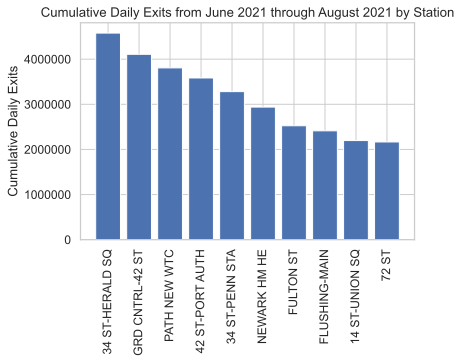

In [56]:
plt.bar(x=station_total_exits['STATION'][:10], height=station_total_exits['DAILY_EXITS'][:10])
plt.xticks(rotation=90)
plt.ylabel('Cumulative Daily Exits')
plt.title('Cumulative Daily Exits from June 2021 through August 2021 by Station')
plt.ticklabel_format(axis='y', style='plain')

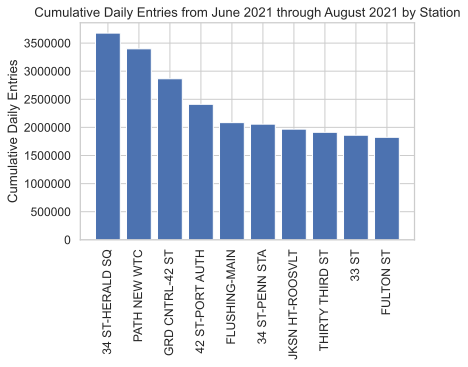

In [55]:
plt.bar(x=station_total_entries['STATION'][:10], height=station_total_entries['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)
plt.ylabel('Cumulative Daily Entries')
plt.title('Cumulative Daily Entries from June 2021 through August 2021 by Station')
plt.ticklabel_format(axis='y', style='plain')

In [35]:
# todo: Create a chart looking at 14th-Union with highest trafficked days of the week. Look into 34th-Penn history
#       Make a markdown file with the highest exit traffic chart (see above)